In [1]:
# import all libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv("data.csv")
df.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# Perform EDA (Look for unique categories in diagnosis, such as benign (B) or malignant (M), and see if the dataset contains any other erroneous results)
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

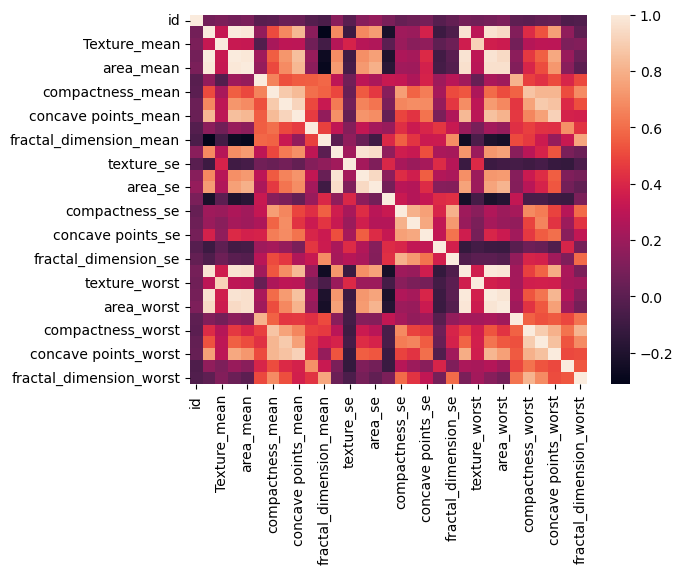

In [5]:
#Correlating the various numerical attributes available in the dataset to check similairites & assess strength of linear relationship amongst them
corr=df.corr()
sns.heatmap(corr)

# Performing Feature Engineering
 1. Missing Value imputation  - with mean of the attribute
 2. Feature Scaling (Skewness transformation) - Dropped id column as it insignificant in the analysis
 3. Categorical Encoding
 4. Outlier Engineering

In [6]:
# Normalization (MinMaxScaler) for regression task and Standardization (StandardScaler) for classification task.
# Automate this process using pipeline
# Use smote for imbalanced classification

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# import scikit learn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler    # Classification- StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

In [10]:
enc=OrdinalEncoder()
enc.fit(df[['diagnosis']])
df[['diagnosis']]=enc.transform(df[['diagnosis']])

In [11]:
# Create a new dataframe X and drop the diagnosis column
# Create a mew dataframe Y having only diagnosis column
X=df.drop(['diagnosis'],axis=1)
Y=df['diagnosis']

In [12]:
# Split the data into training datset & test dataset using random_state in order to check the accuracy of the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [14]:
# Building Pipeline
pipeline=Pipeline([
    #("Logistic Regression",LogisticRegression(random_state=42))
    #("Random Forest",RandomForestClassifier())
    ("Ada Boost Classifier",AdaBoostClassifier(RandomForestClassifier()))
])

In [15]:
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Ada Boost Classifier',
                 AdaBoostClassifier(base_estimator=RandomForestClassifier()))])

In [16]:
#pipeline['Random Forest'].feature_importances_

In [17]:
from sklearn.metrics import mean_absolute_error
Y_pred = pipeline.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, Y_test))
print('Score', pipeline.score(X_test, Y_test))

Mean Absolute Error:  0.027972027972027972
Score 0.972027972027972


In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.972027972027972